In [78]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import KFold
from sklearn.utils import check_array
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from scipy.stats import kurtosis, skew
import statsmodels.api as sm
import statsmodels.api as sma

In [79]:
df = pd.read_excel("/Users/chouhouren/Desktop/論文資料_新/python code/迴歸分析/直線模型_forward_vif5.xlsx")
df = df.dropna()
feture =[]
#feture = df.drop(df[['新總價','編號']], axis=1)
feture = df.drop(['新總價'], axis=1)
x = feture
y = df.新總價

In [80]:
x = np.array(df.iloc[:,1:])
y = np.array(df.iloc[:,0])
#x = np.array([np.concatenate((v,[1])) for v in x])

In [81]:
x_train = sma.add_constant(x) ## let's add an intercept (beta_0) to our model

lm2 = sm.OLS(y,x_train).fit()
lm2.summary()
e=y-lm2.fittedvalues

linreg = LinearRegression(fit_intercept=False)

kf = KFold(len(x), n_folds=10)
xval_err = 0
for train,test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    e=pd.DataFrame(e)


from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0,random_state = 0) 

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train)   #lm.fit(input,output)

y_pred = lm.predict(x_train)

e = y_pred - y_train
e = pd.DataFrame(e)
e

In [82]:
print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(e) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(e) ))

excess kurtosis of normal distribution (should be 0): 0.4191560080872474
skewness of normal distribution (should be 0): 0.04970504188936083


In [85]:
from sklearn import preprocessing

y_pred_norm=preprocessing.scale(lm2.fittedvalues)

e_norm =preprocessing.scale(e)

e_norm

array([ 0.0591085 ,  0.42200539, -0.54198311, ...,  0.79145947,
       -0.68681776,  0.2029226 ])

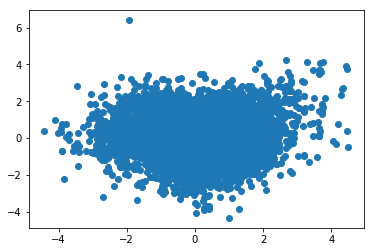

In [84]:
%matplotlib inline


import matplotlib.pyplot as plt
plt.scatter(y_pred_norm, e_norm)
plt.show()